<a href="https://colab.research.google.com/github/LeidyDahian/kaggle/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
# Carga el archivo kaggle.json
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!python -m pip install -qq kaggle
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Saving kaggle.json to kaggle.json
Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Cargar siempre

import pandas as pd
df = pd.read_csv("train.csv")


In [ ]:
# Cuantas columnas hay en el dateframe
df.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [ ]:
# estos son los primeros datos de las columnas del datafarme
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
# respuestas al nivel de educación de la madre
df['FAMI_EDUCACIONMADRE'].unique()


array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [ ]:
# Respuestas al nivel de educación del padre
df['FAMI_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [ ]:
print( "Madres que culminaron la secundaria:",sum(df.FAMI_EDUCACIONMADRE=="Secundaria (Bachillerato) completa"), "y", "Padres que culminaron la secundaria:",sum(df.FAMI_EDUCACIONPADRE=="Secundaria (Bachillerato) completa"))

print( "Datos vacios en educación de la madre:",sum(df.FAMI_EDUCACIONMADRE.isna()), "y","Datos vacios en educación del padre:", sum(df.FAMI_EDUCACIONPADRE.isna()))

Madres que culminaron la secundaria: 141744 y Padres que culminaron la secundaria: 128289
Datos vacios en educación de la madre: 23664 y Datos vacios en educación del padre: 23178


<Axes: xlabel='FAMI_EDUCACIONMADRE'>

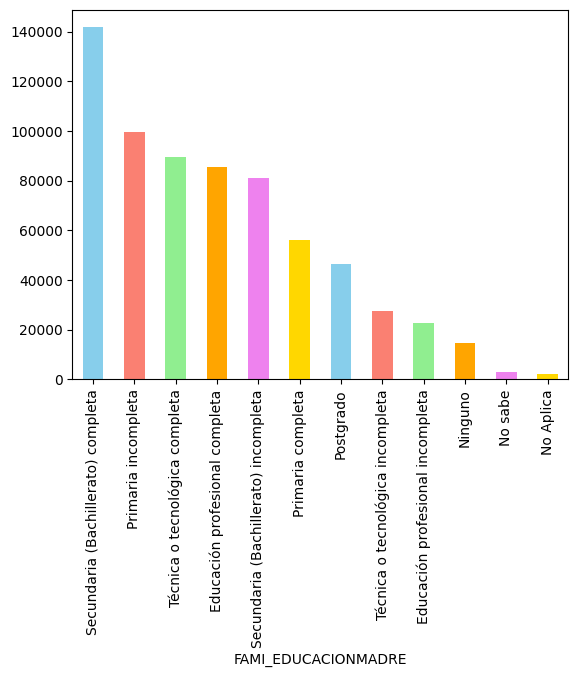

In [ ]:
colores = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'gold']
df.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar', color=colores)
# visualmente, se observa que gran parte de las madres se gradue de bachillerato

In [ ]:
(df['FAMI_EDUCACIONMADRE'] == 'Secundaria (Bachillerato) completa').mean()
# las madres que cuentan solo con el bachillerato completo, son alrededor del
# 20% de las respuestas

np.float64(0.20468447653429603)